<a href="https://colab.research.google.com/github/AssiaThabet/first_git/blob/main/practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Пробую самостоятельно создать модель классического машинного обучения

In [ ]:
import pandas as pd
df = pd.read_csv('CAvideos.csv')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


Я собираюсь посмотреть, насколько лайки зависят от просмотров. Я вижу в этом положительную карыляцию

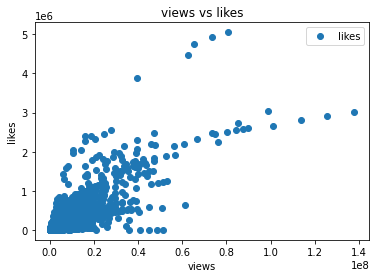

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
df.plot(x='views', y='likes', style='o') 
plt.title('views vs likes') 
plt.xlabel('views') 
plt.ylabel('likes') 
plt.show()


### Подготовк данных

In [ ]:
df = df[['views', 'likes']]

In [ ]:
# разделене на звисимые и независиые переменные
X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression # импорт инейной модели
regressor = LinearRegression() # создание модели машинного обучения
regressor.fit(X_train, y_train) # тренировка модели с данными

LinearRegression()

### Прогнозы

In [ ]:
y_pred = regressor.predict(X_test)

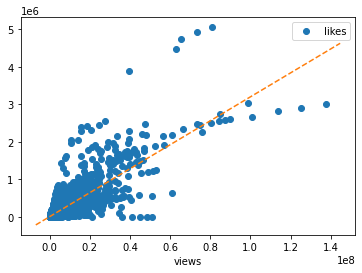

In [ ]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
df.plot(x='views', y='likes', style='o') 
abline(regressor.coef_, regressor.intercept_)
# plt.title('views vs likes') 
# plt.xlabel('views') 
# plt.ylabel('likes') 
#plt.show()

In [ ]:
# сделаем таблицу, с правильными значениями и значениями, которые мы получили
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df

,Actual,Predicted
0,10520,8445.007414
1,6799,8377.398575
2,15024,15441.643938
3,7783,43634.657271
4,36695,18955.802532
...,...,...
8172,16736,13666.472809
8173,4760,25952.630674
8174,1143,11171.269149
8175,15254,15887.440714


In [ ]:
from sklearn import metrics # импорт
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) #MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 24735.36133434123
Mean Squared Error: 5940525407.358547
Root Mean Squared Error: 77074.80397223562


Я, конечно сильно ошиблась и модель получилась не очень, но всёравно.